<a href="https://colab.research.google.com/github/Rebekah4256/python-final-cafes-Rebekah-Ryan/blob/main/Python_Final_Cafes_Rebekah_Ryan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
import pandas as pd #imports pandas as pd
import numpy as np #imports numpy as np
import matplotlib.pyplot as plt #imports matplotlib as plt
import seaborn as sns #imports seaborn as sns
import plotly.express as px #imports plotly as px

data = pd.read_excel('/content/Coffee Shop Sales.xlsx') #inserts the coffee shop file into colab and makes it a variable called data

df = pd.DataFrame(data) #turns the data into a pandas DataFrame

In [212]:
df.info() #checking for how many missing values there are

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [213]:
df.drop_duplicates(inplace=True) #this removes any duplicats if there are any
print(df.head)

<bound method NDFrame.head of         transaction_id transaction_date transaction_time  transaction_qty  \
0                    1       2023-01-01         07:06:11                2   
1                    2       2023-01-01         07:08:56                2   
2                    3       2023-01-01         07:14:04                2   
3                    4       2023-01-01         07:20:24                1   
4                    5       2023-01-01         07:22:41                2   
...                ...              ...              ...              ...   
149111          149452       2023-06-30         20:18:41                2   
149112          149453       2023-06-30         20:25:10                2   
149113          149454       2023-06-30         20:31:34                1   
149114          149455       2023-06-30         20:57:19                1   
149115          149456       2023-06-30         20:57:19                2   

        store_id   store_location  product_id

In [214]:
df['month'] = df['transaction_date'].dt.month_name() #this is adding a month column with the month namm
df['month#'] = df['transaction_date'].dt.month #this is adding a month colunm with the month number
df["sales"] = df["transaction_qty"] * df["unit_price"] #this is creating a total sales column
df["hour"] = pd.to_datetime(df["transaction_time"], format="%H:%M:%S").dt.hour #this makes a column for the hour only of the perchas
df["day_of_week"] = pd.to_datetime(df["transaction_date"]).dt.day_name() #this is makeing a column for what day of the week

In [215]:
pro_cnt = df.value_counts('product_category') #counts all the product category column

ss = df.groupby('store_location')['unit_price'].sum() #seprates all the stores and then sums the unit prices

pss = df.groupby(['store_location', 'product_category'])['unit_price'].mean()#this is looking at what location sold the most of what product

qs = df.groupby('month').agg({'transaction_qty':'mean'})#this is looking at what month had on average had the highest quantity sold

ast = df[df['store_location']== "Astoria"] #separates all the astorai stores from the other stores

hk= df[df['store_location'] == "Hell's Kitchen"] #separates all the hells kitchen stores from the other stores

lm = df[df['store_location'] == "Lower Manhattan"] #separates all the lower mangattan stores from the other stores

In [216]:
print(pro_cnt) #prints the product count

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64


In [217]:
print(ss) #prints store sales

store_location
Astoria            171272.41
Hell's Kitchen     172205.67
Lower Manhattan    160864.95
Name: unit_price, dtype: float64


In [218]:
print(pss) #prints the sales by store the product catigory

store_location   product_category  
Astoria          Bakery                 3.545720
                 Branded               19.559140
                 Coffee                 3.024235
                 Coffee beans          20.356972
                 Drinking Chocolate     4.144826
                 Flavours               0.800000
                 Loose Tea              9.284884
                 Packaged Chocolate     9.906455
                 Tea                    2.822429
Hell's Kitchen   Bakery                 3.569378
                 Branded               16.319328
                 Coffee                 3.015869
                 Coffee beans          21.507083
                 Drinking Chocolate     4.159713
                 Flavours               0.800000
                 Loose Tea              9.198660
                 Packaged Chocolate     8.623198
                 Tea                    2.814699
Lower Manhattan  Bakery                 3.540106
                 Branded         

In [219]:
print(ast.head()) #prints the head of the astoria data frame

     transaction_id transaction_date transaction_time  transaction_qty  \
105             106       2023-01-01         11:01:48                1   
106             107       2023-01-01         11:01:58                1   
107             108       2023-01-01         11:01:58                1   
111             112       2023-01-01         11:08:11                1   
113             114       2023-01-01         11:09:01                1   

     store_id store_location  product_id  unit_price    product_category  \
105         3        Astoria          22        2.00              Coffee   
106         3        Astoria          38        3.75              Coffee   
107         3        Astoria          75        3.50              Bakery   
111         3        Astoria          59        4.50  Drinking Chocolate   
113         3        Astoria          59        4.50  Drinking Chocolate   

         product_type               product_detail    month  month#  sales  \
105       Drip coffe

In [220]:
ast1 = ast.groupby('transaction_date')['transaction_qty'].sum().reset_index() #this groups the transaction dates for the astoria store and then add the transaction qty
ast2= ast1.sort_values('transaction_qty', ascending=True) #this sorts the values in descending order

In [221]:
#I had help of chat gpt for how to clean up the chat and make it more readable

fig_astoria = px.line(
    ast2,
    x="transaction_qty",
    y="transaction_date",
    title="Transaction Trends – Astoria",
    template="plotly_white",
) #this is getting the line chart mad and set up with a label
fig_astoria.update_traces(line=dict(color="peru", width=3)) #this is giveing the graph a color and makeing sure it is more readable

fig_astoria.update_layout(
    title={'x': 0.5, 'font': dict(size=20)},
    xaxis_title="Number of Transactions",
    yaxis_title="Date",
    hovermode="y unified",
    xaxis=dict(showgrid=True, gridcolor="rgba(0,0,0,0.1)"),
    yaxis=dict(showgrid=True, gridcolor="rgba(0,0,0,0.1)"),
    margin=dict(l=60, r=40, t=80, b=60) #this is adding titles to the x and y axis making it so you can get information when you hover over the graph aswell as adding grid lines to make it more readable
)
fig_astoria.show()

In [222]:
print(hk.head()) #prints the head of the hells kitchen data frame

    transaction_id transaction_date transaction_time  transaction_qty  \
17              18       2023-01-01         08:00:18                1   
18              19       2023-01-01         08:00:39                2   
19              20       2023-01-01         08:11:45                1   
20              21       2023-01-01         08:17:27                2   
23              24       2023-01-01         08:29:38                1   

    store_id  store_location  product_id  unit_price    product_category  \
17         8  Hell's Kitchen          42        2.50                 Tea   
18         8  Hell's Kitchen          59        4.50  Drinking Chocolate   
19         8  Hell's Kitchen          61        4.75  Drinking Chocolate   
20         8  Hell's Kitchen          33        3.50              Coffee   
23         8  Hell's Kitchen          56        2.55                 Tea   

             product_type                product_detail    month  month#  \
17      Brewed herbal tea   

In [223]:
hk1 = hk.groupby('transaction_date')['transaction_qty'].sum().reset_index() #this groups the transaction dates for the hells kitchen store and then add the transaction qty
hk2= hk1.sort_values('transaction_qty', ascending=True)#this sorts the values in descending order

In [224]:
#I had help of chat gpt for how to clean up the chat and make it more readable

fig_hells = px.line(
    hk2,
    x="transaction_qty",
    y="transaction_date",
    title="Transaction Trends – Hell’s Kitchen",
    template="plotly_white",
)#this is getting the line chart mad and set up with a label
fig_hells.update_traces(line=dict(color="chocolate", width=3)) #this is giveing the graph a color and makeing sure it is more readable

fig_hells.update_layout(
    title={'x': 0.5, 'font': dict(size=20)},
    xaxis_title="Number of Transactions",
    yaxis_title="Date",
    hovermode="y unified",
    xaxis=dict(showgrid=True, gridcolor="rgba(0,0,0,0.1)"),
    yaxis=dict(showgrid=True, gridcolor="rgba(0,0,0,0.1)"),
    margin=dict(l=60, r=40, t=80, b=60) #this is adding titles to the x and y axis making it so you can get information when you hover over the graph aswell as adding grid lines to make it more readable
)
fig_hells.show()

In [225]:
print(lm.head()) #prints the head of the lower manhattan data frame

   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail    month  month#  sales  \
0  Gourmet brewed coffee     

In [226]:
lm1 = lm.groupby('transaction_date')['transaction_qty'].sum().reset_index() #this groups the transaction dates for the lower manhattan store and then add the transaction qty
lm2= lm1.sort_values('transaction_qty', ascending=True)#this sorts the values in descending order

In [227]:
#I had help of chat gpt for how to clean up the chat and make it more readable

fig2 = px.line(
    lm2,
    x="transaction_qty",
    y="transaction_date",
    title="Transaction Trends – Lower Manhattan",
    template="plotly_white",
)#this is getting the line chart mad and set up with a label

fig2.update_traces(line=dict(color="sienna", width=3)) #this is giveing the graph a color and makeing sure it is more readable

fig2.update_layout(
    title={
        'text': "Transaction Trends – Lower Manhattan",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=20)
    },
    xaxis_title="Number of Transactions",
    yaxis_title="Date",
    template="plotly_white",
    hovermode="y unified",
    xaxis=dict(showgrid=True, gridcolor="rgba(0,0,0,0.1)"),
    yaxis=dict(showgrid=True, gridcolor="rgba(0,0,0,0.1)"),
    margin=dict(l=60, r=40, t=80, b=60) #this is adding titles to the x and y axis making it so you can get information when you hover over the graph aswell as adding grid lines to make it more readable
)

fig2.show()

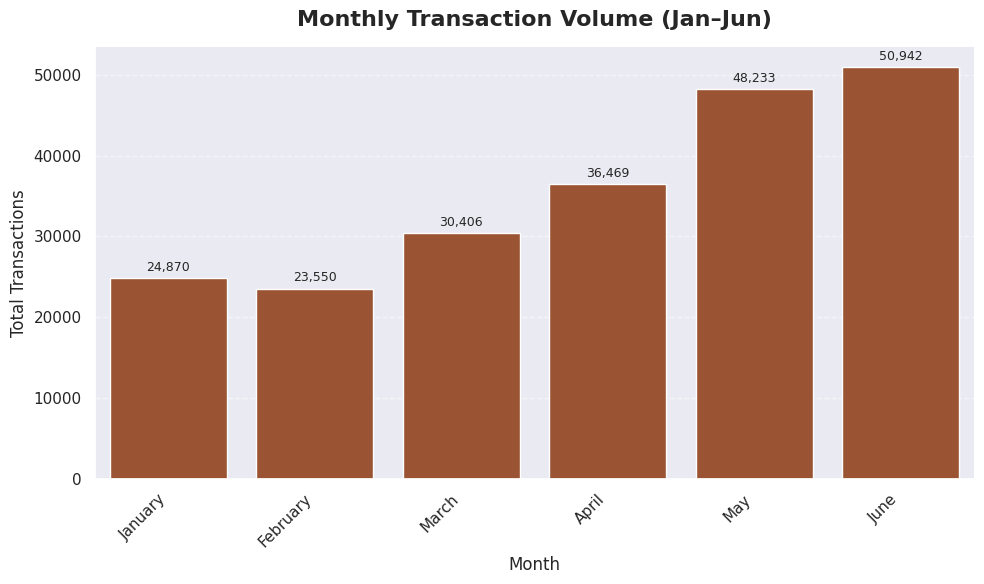

In [228]:
#I had help of chat gpt for how to clean up the chat and make it more readable

qs = df.groupby('month').agg({'transaction_qty':'sum'}).reset_index() #this is grouping by month then getting the the sum of the quantity

month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]#this is makeing an order for months

qs["month"] = pd.Categorical(qs["month"], categories=month_order, ordered=True) #this is putting the months in order

qs = qs.sort_values("month") #this is making the have the months in order and sorted


qs = qs[qs["transaction_qty"] > 0] # Drop empty months and remove unused categories
qs["month"] = qs["month"].cat.remove_unused_categories() #this removes the empty data with months we dont have data for

plt.figure(figsize=(10,6)) #this makes sure the graph readable
sns.barplot(data=qs, x="month", y="transaction_qty", color="sienna", saturation=0.9) #making a monthly transaction volume graph

for index, value in enumerate(qs["transaction_qty"]):
    plt.text(index, value + (qs["transaction_qty"].max() * 0.01), f"{int(value):,}",
             ha='center', va='bottom', fontsize=9)#this is adding label for each bar in the plot

plt.title("Monthly Transaction Volume (Jan–Jun)", fontsize=16, fontweight='bold', pad=15) #adds graph title
plt.xlabel("Month", fontsize=12) #x axis title
plt.ylabel("Total Transactions", fontsize=12) #y axis title
plt.xticks(rotation=45, ha='right')#this is making the bar titles slanted
plt.grid(axis='y', linestyle='--', alpha=0.5) #this is adding grid lines in the backround
sns.despine() #this is removeing the borders
plt.tight_layout()#making sure nothing is cut off
plt.show()#show graph

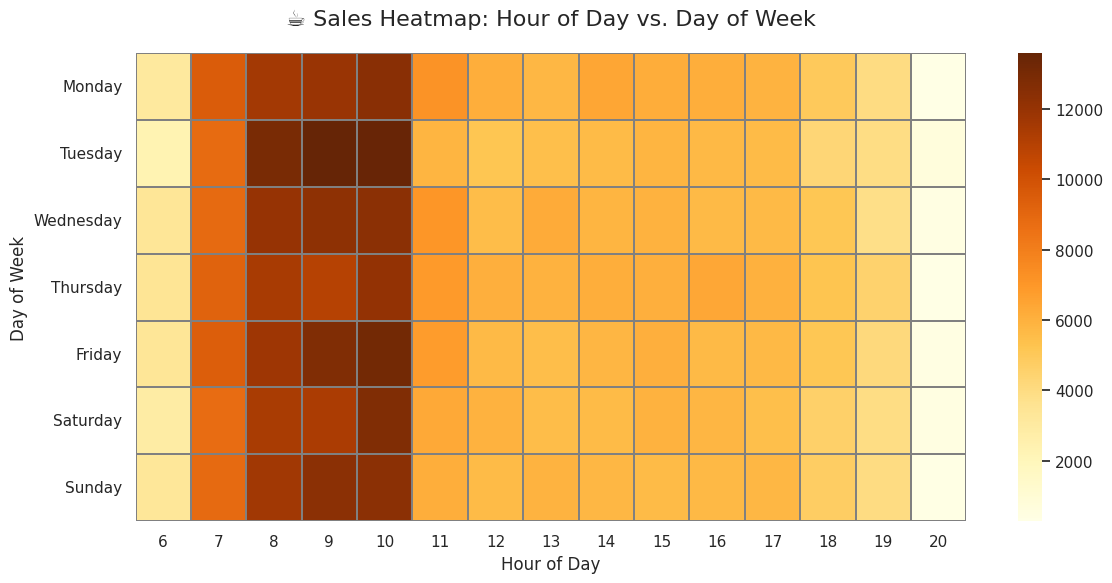

In [229]:
#I had help of chat gpt to brainstorm what chart to use and how to clean up the chat and make it more readable

heatmap_data = df.pivot_table(
    index="day_of_week",
    columns="hour",
    values="sales",
    aggfunc="sum"
)#this is making the heat map

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"] #puting the days of the week in order
heatmap_data = heatmap_data.reindex(days_order) #making the days of the week in order for the heat map

plt.figure(figsize=(12,6)) #making sure everything is spread out enough
sns.heatmap(
    heatmap_data,
    cmap="YlOrBr",     # warm coffee-colored palette
    linewidths=0.3,
    linecolor="gray"
)#seting the color pallet

plt.title("☕ Sales Heatmap: Hour of Day vs. Day of Week", fontsize=16, pad=20) #adding a title to graph
plt.xlabel("Hour of Day") #x label
plt.ylabel("Day of Week")#y label
plt.xticks(rotation=0) #seting x ticks to 0
plt.yticks(rotation=0) #seting y ticks to 0
plt.tight_layout() #making sure nothing is cut off
plt.show() #show map

In [231]:
cordf = df[['transaction_date', 'transaction_qty', 'unit_price', 'month#', 'sales']].corr()#this is finding the corrilation between transaction date, transaction quantiy, unti price, and what month it was bought in aswell as total sales
print(cordf)

                  transaction_date  transaction_qty  unit_price    month#  \
transaction_date          1.000000         0.009533    0.000565  0.985838   
transaction_qty           0.009533         1.000000   -0.123546  0.002849   
unit_price                0.000565        -0.123546    1.000000 -0.002004   
month#                    0.985838         0.002849   -0.002004  1.000000   
sales                     0.005271         0.356231    0.685550  0.001243   

                     sales  
transaction_date  0.005271  
transaction_qty   0.356231  
unit_price        0.685550  
month#            0.001243  
sales             1.000000  


With transaction date, there is little to no correlation with transaction quantity, unit price, and total sales, and a strong correlation with what month it was sold in. For transaction quantity, there is little to no correlation with month and sales, and a little negative correlation with unit price. The correlations for unit price show little to no negative relation with month and a strong correlation with total sales. And finally, there is little to no correlation with months and total sales.

The purpose of this correlation test was to see if there were any correlations between any of the chosen rows of data.